In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# using R style for matplotlib
plt.style.use('ggplot')

###  We are using data [Nyc open data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9)

In [2]:
complaints = pd.read_csv('data/311-service-requests.csv', dtype = 'unicode')

In [3]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [6]:
complaints.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [7]:
complaints.dtypes

Unique Key                        object
Created Date                      object
Closed Date                       object
Agency                            object
Agency Name                       object
Complaint Type                    object
Descriptor                        object
Location Type                     object
Incident Zip                      object
Incident Address                  object
Street Name                       object
Cross Street 1                    object
Cross Street 2                    object
Intersection Street 1             object
Intersection Street 2             object
Address Type                      object
City                              object
Landmark                          object
Facility Type                     object
Status                            object
Due Date                          object
Resolution Action Updated Date    object
Community Board                   object
Borough                           object
X Coordinate (St

In [8]:
complaints['Complaint Type']

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

### To obtain the first five rows of a dataframe

* Use df[:5], to get from 2 to 7 rows : df[2:7], excludes 7

In [9]:
complaints[2:7]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7499893014072,-73.88198770727831,"(40.7499893014072, -73.88198770727831)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.68153278675525,-73.83173699701601,"(40.68153278675525, -73.83173699701601)"


### To obtain certain rows of a particular column

In [10]:
complaints['Unique Key'][:5]

0    26589651
1    26593698
2    26594139
3    26595721
4    26590930
Name: Unique Key, dtype: object

### Selecting multiple columns

In [11]:
complaints[['Unique Key', 'Borough']]

,Unique Key,Borough
0,26589651,QUEENS
1,26593698,QUEENS
2,26594139,MANHATTAN
3,26595721,MANHATTAN
4,26590930,MANHATTAN
...,...,...
111064,26426013,BROOKLYN
111065,26428083,QUEENS
111066,26428987,MANHATTAN
111067,26426115,BROOKLYN


### 10-15 rows of this two above columns

In [12]:
complaints[['Unique Key','Borough']][10:15]

,Unique Key,Borough
10,26595176,BROOKLYN
11,26591982,MANHATTAN
12,26594169,MANHATTAN
13,26594391,BRONX
14,26590917,BROOKLYN


In [13]:
complaint_counts = complaints['Complaint Type'].value_counts()

In [14]:
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

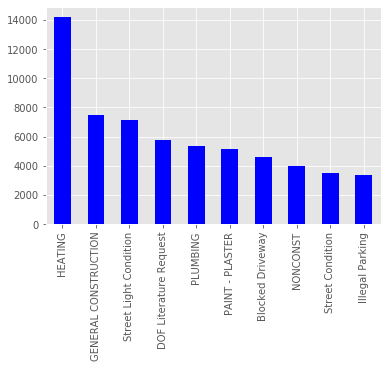

In [15]:
complaint_counts[:10].plot(kind = 'bar', color = 'blue')

### Learning proper querying

* find out only the noise related complaints

In [16]:
# All the noise related complains are:
# 1st way to accomplish

is_noise = [i for i in complaints['Complaint Type'].unique() if 'noise' in i.lower()]
is_noise
noise = np.isin(complaints['Complaint Type'], is_noise)
complaints[noise]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7499893014072,-73.88198770727831,"(40.7499893014072, -73.88198770727831)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.67181584567338,-73.84309181950769,"(40.67181584567338, -73.84309181950769)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111059,26429040,10/04/2013 12:04:52 AM,10/04/2013 03:01:04 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10003,99 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.727251287038676,-73.98866028603422,"(40.727251287038676, -73.98866028603422)"
111060,26434084,10/04/2013 12:04:00 AM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10036,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.76040500039782,-73.98747426235285,"(40.76040500039782, -73.98747426235285)"
111061,26426164,10/04/2013 12:03:00 AM,10/04/2013 02:14:57 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11106,30-09 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.762278541098084,-73.92601303458156,"(40.762278541098084, -73.92601303458156)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"


In [17]:
#@nd way to accomplish the task

is_noise = [i for i in complaints['Complaint Type'].unique() 
            if 'noise' in i.lower()]

noise = list()
for i in complaints['Complaint Type']:
    if i in is_noise:
        noise.append(True)
    else:
        noise.append(False)
        
complaints[noise]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7499893014072,-73.88198770727831,"(40.7499893014072, -73.88198770727831)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.67181584567338,-73.84309181950769,"(40.67181584567338, -73.84309181950769)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111059,26429040,10/04/2013 12:04:52 AM,10/04/2013 03:01:04 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10003,99 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.727251287038676,-73.98866028603422,"(40.727251287038676, -73.98866028603422)"
111060,26434084,10/04/2013 12:04:00 AM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10036,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.76040500039782,-73.98747426235285,"(40.76040500039782, -73.98747426235285)"
111061,26426164,10/04/2013 12:03:00 AM,10/04/2013 02:14:57 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11106,30-09 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.762278541098084,-73.92601303458156,"(40.762278541098084, -73.92601303458156)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"


In [18]:
# 3rd and the easiest way to accomplish the task is:
# by string vectorising into true false, a two liner

noise = complaints['Complaint Type'].str.lower().str.contains('noise')
complaints[noise]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7499893014072,-73.88198770727831,"(40.7499893014072, -73.88198770727831)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.67181584567338,-73.84309181950769,"(40.67181584567338, -73.84309181950769)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111059,26429040,10/04/2013 12:04:52 AM,10/04/2013 03:01:04 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10003,99 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.727251287038676,-73.98866028603422,"(40.727251287038676, -73.98866028603422)"
111060,26434084,10/04/2013 12:04:00 AM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10036,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.76040500039782,-73.98747426235285,"(40.76040500039782, -73.98747426235285)"
111061,26426164,10/04/2013 12:03:00 AM,10/04/2013 02:14:57 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11106,30-09 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.762278541098084,-73.92601303458156,"(40.762278541098084, -73.92601303458156)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"


### find the "Incident Address" of the noise related complains

Find out later

In [19]:
pd.DataFrame(complaints[noise]['Incident Address'])

,Incident Address
0,90-03 169 STREET
2,4060 BROADWAY
3,WEST 72 STREET
5,37 AVENUE
7,137-09 CROSSBAY BOULEVARD
...,...
111059,99 2 AVENUE
111060,NaN
111061,30-09 BROADWAY
111066,344 EAST 28 STREET


In [20]:
noise_side = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[noise_side & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634103775951736,-73.91105541883589,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6617931276793,-73.95993363978067,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724599563793525,-73.95427134534344,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.63616876563881,-73.97245504682485,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6429222774404,-73.97876175474585,"(40.6429222774404, -73.97876175474585)"


In [21]:
complaints[noise_side & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


### A digression on numpy arrays

In [22]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [23]:
np.array([1,2,3])

array([1, 2, 3])

In [24]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [25]:
arr = np.array([1,2,3])

In [26]:
arr !=2

array([ True, False,  True])

In [27]:
arr[arr!= 2]

array([1, 3])

###  Which borough has the highest noise complaint

In [28]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

# the answer is manhattan

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

In [29]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()
borough= noise_complaint_counts / complaint_counts
borough

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

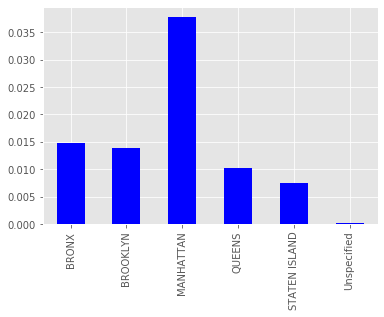

In [30]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar', color = 'blue')

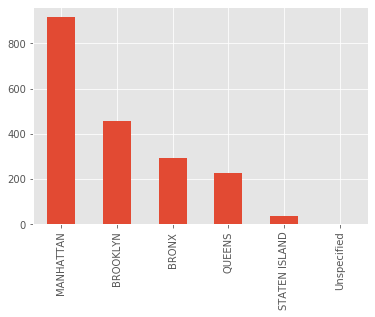

In [31]:
noise_complaint_counts.plot(kind = 'bar')

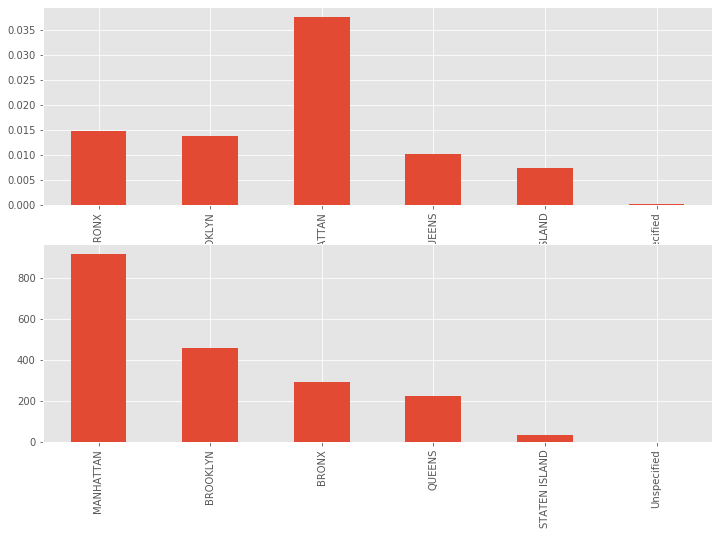

In [32]:
fig, axn = plt.subplots(2, 1, figsize = (12, 8))

borough.plot(kind='bar', ax=axn[0])
noise_complaint_counts.plot(kind = 'bar', ax =axn[1])

In [33]:
borough_merge = pd.concat([borough, noise_complaint_counts], axis = 1).reset_index()
borough_merge.rename(columns={'index': 'borough'}, inplace = True)
borough_merge

C:\Users\Anurima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,borough,Borough,Borough
0,BRONX,0.014833,292
1,BROOKLYN,0.013864,456
2,MANHATTAN,0.037755,917
3,QUEENS,0.010143,226
4,STATEN ISLAND,0.007474,36
5,Unspecified,0.000141,1


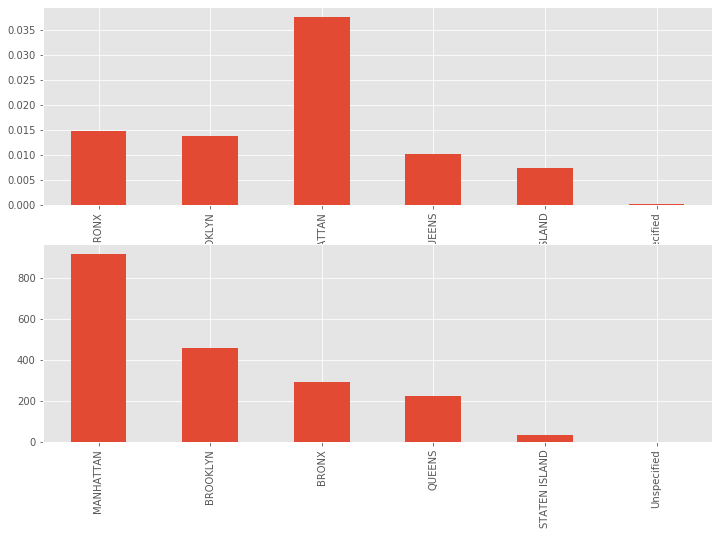

In [34]:
fig, axn = plt.subplots(2, 1, figsize = (12, 8))

borough.plot(kind='bar', ax=axn[0])
noise_complaint_counts.plot(kind = 'bar', ax =axn[1])